# Heart Attack Prediction

About 610,000 people die of heart disease in the India every year–that’s 1 in every 4 deaths.1
Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2019 were in men.1
Coronary Heart Disease(CHD) is the most common type of heart disease, killing over 370,000 people annually.
Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
data=pd.read_excel("F:/AVINASH MALLAH/data science/Assignment/heart.xlsx")
desc=pd.read_excel("F:/AVINASH MALLAH/data science/Assignment/heart.xlsx")

In [6]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
desc

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


data cleaning/data wranglikng/ data preprocesing

In [9]:
duplicate_rows = data[data.duplicated()]
print("Number ofDuplicate row: ",duplicate_rows.shape)

Number ofDuplicate row:  (1, 14)


In [10]:
data1 =data.drop_duplicates()

In [11]:
data1.shape

(302, 14)

In [12]:
data1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
data1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# this are pre processing step

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

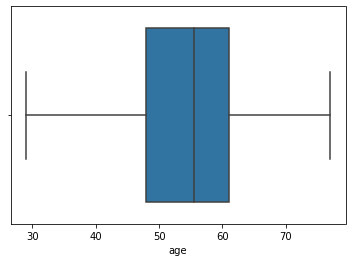

In [13]:
sns.boxplot(data1['age'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex'>

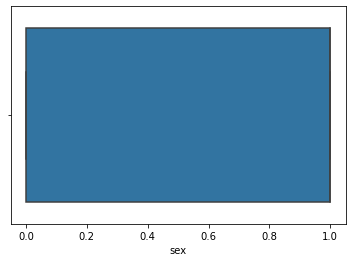

In [19]:
sns.boxplot(data1['sex'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp'>

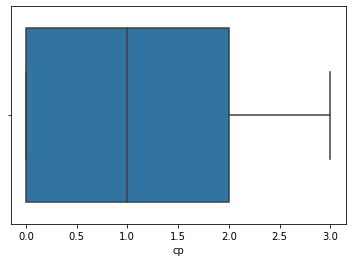

In [14]:
sns.boxplot(data1['cp'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trtbps'>

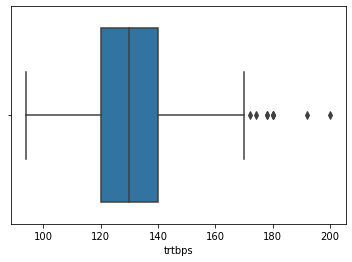

In [22]:
sns.boxplot(data1['trtbps'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalachh'>

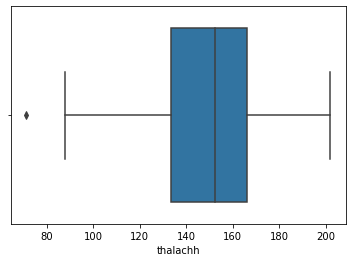

In [23]:
sns.boxplot(data1['thalachh'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

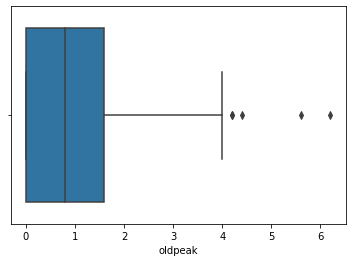

In [24]:
sns.boxplot(data1['oldpeak'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

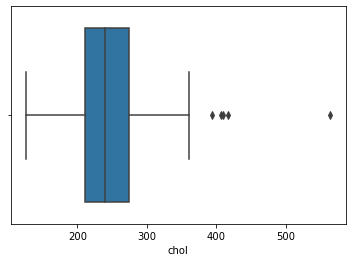

In [25]:
sns.boxplot(data1['chol'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caa'>

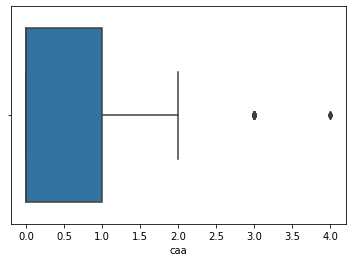

In [26]:
sns.boxplot(data1['caa'])

C:\Users\Alka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thall'>

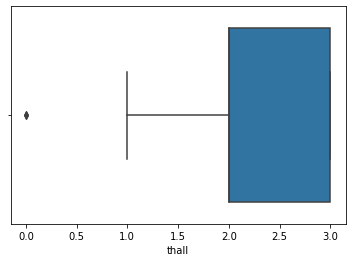

In [27]:
sns.boxplot(data1['thall'])

In [15]:
Q1 =data1.quantile(0.25)
Q3 =data1.quantile(0.75)

In [16]:
IQR = Q3 -Q1
IQR

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64

In [17]:
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]

In [18]:
data2.shape

(228, 14)

In [19]:
pearson_corr =data2.corr()

<AxesSubplot:>

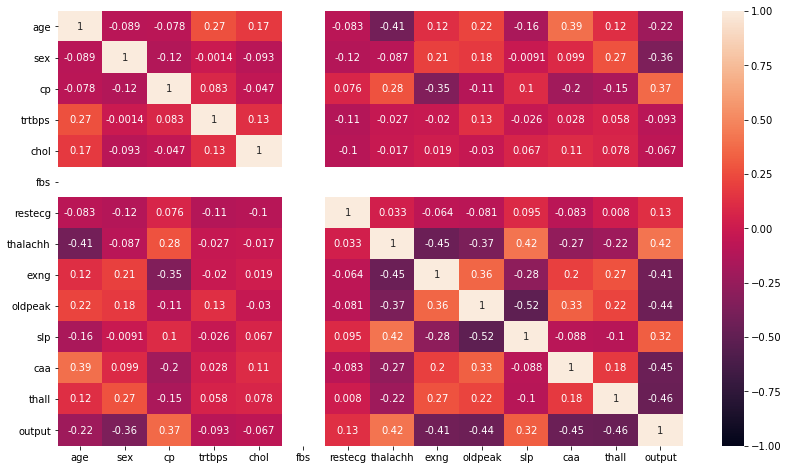

In [40]:
fig = plt.subplots(figsize =(14,8))
sns.heatmap(pearson_corr,vmax=1,vmin=-1,annot = True)

In [20]:
pearson_corr['output']

age        -0.215120
sex        -0.363483
cp          0.371115
trtbps     -0.092560
chol       -0.067321
fbs              NaN
restecg     0.131641
thalachh    0.417870
exng       -0.414407
oldpeak    -0.439194
slp         0.323569
caa        -0.447167
thall      -0.455780
output      1.000000
Name: output, dtype: float64

# model building

In [21]:
del data2['trtbps']
del data2['chol']
del data2['fbs']

In [22]:
data2.shape

(228, 11)

In [23]:
X =data2.drop("output",axis=1)
y=data2["output"]

In [46]:
y

1      1
2      1
3      1
4      1
5      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: output, Length: 228, dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3)

In [25]:
Dsc_tree = DecisionTreeClassifier(criterion='entropy')

In [28]:
%%time
model_train = Dsc_tree.fit(X_train,y_train)
print("Training Complete")

Training Complete
Wall time: 16 ms


In [29]:
pred = model_train.predict(X_test)
pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [30]:
confusion_matrix(y_test,pred)

array([[22, 12],
       [ 5, 30]], dtype=int64)

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        34
           1       0.71      0.86      0.78        35

    accuracy                           0.75        69
   macro avg       0.76      0.75      0.75        69
weighted avg       0.76      0.75      0.75        69

